Refer to documentation at: https://keras.io/preprocessing/image/

Import packages. 

In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


Define test and train directories. 

In [2]:
test_dir = Path('../data/processed/test')
train_dir = Path('../data/processed/train')

model_out_dir = Path('../models')

Create a model architecture. 

In [3]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

Input <b>Model Name</b>. 

In [4]:
model_name = 'third'

In [5]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(128, 128, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(48, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(48, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Compile with binary crossentropy loss and and RMS Prop optimizer.  

In [6]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

Reduced batch_size to limit CPU load.  

train_generator and validation_generator nicely stream from a directory containing training/test images. 

In [7]:
batch_size = 4

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255, # data should be rescale to values more appropriate for gradient descent
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# For testing, just rescale the data (it doesn't make sense to generate augmented data)
test_datagen = ImageDataGenerator(rescale=1./255)

# Read data in from train_dir 
train_generator = train_datagen.flow_from_directory(
        train_dir,  # this is the training directory
        target_size=(128, 128), 
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# Read data in from test_dir 
validation_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(128, 128),
        batch_size=batch_size,
        class_mode='binary')

Found 1326 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


Fit using the generators above.  Train for 50 epochs. 

In [11]:
model.fit_generator(
        train_generator,
        steps_per_epoch=train_generator.samples // batch_size,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples // batch_size)

trained_model_out_dir = model_out_dir / model_name
trained_model_out_dir.mkdir(parents=True, exist_ok=True)

model.save_weights(trained_model_out_dir / (model_name + '.h5'))  # Save first weights

# Save model JSON
model_json = model.to_json()
with open(trained_model_out_dir / (model_name + '.json'), "w") as json_file:
    json_file.write(model_json)

In [28]:
from skimage import color, io

import os

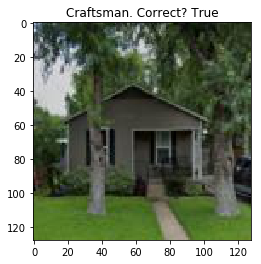

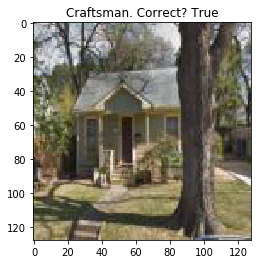

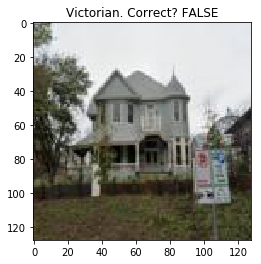

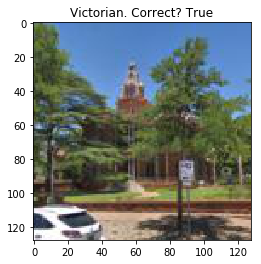

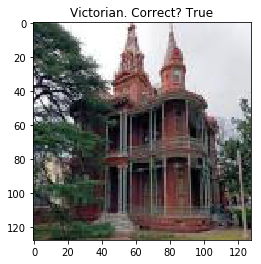

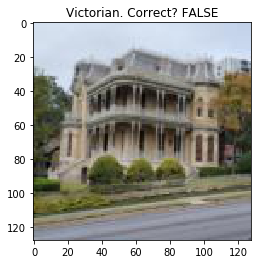

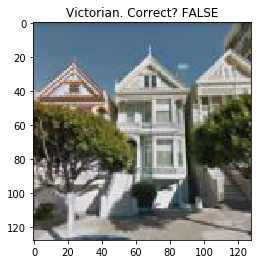

In [29]:
oos_test_dir = Path(r'C:\Users\Daniel\Documents\Python Scripts\archlass\data\processed\Testing Images')

oos_preds = []
for file in os.listdir(oos_test_dir):
    if 'victorian' in file:
        label = 1
    else:
        label = 0
    file_path = oos_test_dir / file
    im = io.imread(oos_test_dir / file).reshape(128, 128, 3)
    im = np.expand_dims(im, axis=0)/255.
    pred = model.predict(im)
    
    if np.round(pred[0][0]) == label:
        correct = True
    else:
        correct = False
    
    fig = plt.figure()
    ax = fig.add_subplot(111)

    title = 'Victorian. ' if label == 1 else 'Craftsman. '
    title += 'Correct? '
    title += 'True' if correct else 'FALSE'
    
    ax.imshow(im[0,], cmap='gray')
    ax.set_title(title)

In [30]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
activation_11 (Activation)   (None, 126, 126, 32)      0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 61, 61, 48)        13872     
_________________________________________________________________
activation_12 (Activation)   (None, 61, 61, 48)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 30, 30, 48)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 48)        20784     
__________